<a href="https://colab.research.google.com/github/Jejes-Rosy/C2.23-B-02/blob/main/Mall-customers-K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# 2. Load dataset
df = pd.read_csv("Mall_Customers.csv")  # Pastikan file sudah diupload ke Colab

# 3. Periksa dan bersihkan nama kolom
df.columns = df.columns.str.strip()  # Hilangkan spasi
df.columns = df.columns.str.replace('–', '-', regex=False) # Ganti en dash dengan minus biasa

In [4]:
# 4. Seleksi fitur numerik yang digunakan untuk clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data = df[features]

# 5. Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 6. Jalankan K-Means
k = 5  # Jumlah cluster
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# 7. Tambahkan hasil cluster ke dataframe
data['Cluster'] = labels


/tmp/ipython-input-4-3090880358.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [5]:
# 8. Reduksi dimensi dengan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

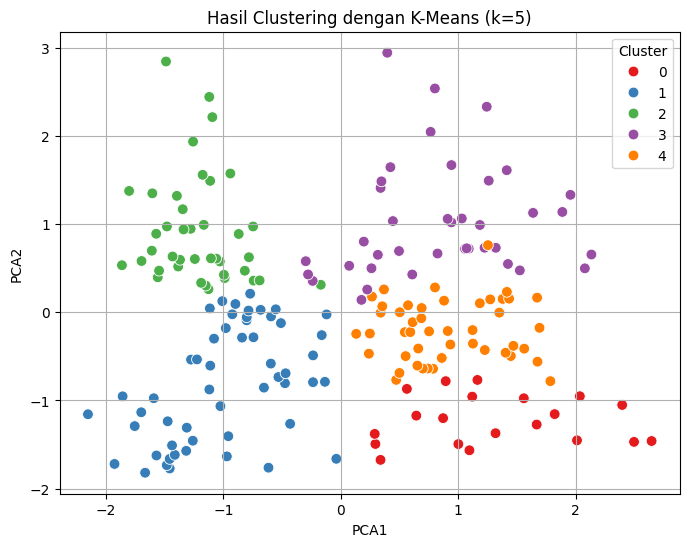

In [6]:
# 9. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60)
plt.title(f"Hasil Clustering dengan K-Means (k={k})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [7]:
# 10. Evaluasi dengan Silhouette Score
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4166
